# МЛ практика 4. Обучение без учителя (Кластеризация)

## Цель занятия:

Изучить методы обучения без учителя, познакомиться с алгоритмами кластеризации, понять их применение и реализовать модели кластеризации с использованием различных алгоритмов.

Задача практики:
- Определение обучения без учителя
- Разбор алгоритмов DBSSCAN, K-means
- Метрики качества кластеризации
- Пример полезных задач, которые решает кластеризация

## Задача обучения без учителя

Обучение без учителя (unsupervised learning) — это тип машинного обучения, при котором алгоритм работает с неразмеченными данными, то есть без заранее известных правильных ответов (меток классов, целевых значений и т.п.).
Модель пытается самостоятельно найти закономерности, структуры или скрытые зависимости в данных.

Основные задачи обучения без учителя:

1. Кластеризация — группировка похожих объектов.
Пример: алгоритм K-Means делит клиентов банка на сегменты по их поведению.

2. Снижение размерности — упрощение данных при сохранении основной информации.
Пример: метод PCA (анализ главных компонент) используется для визуализации данных.

**В задачах обучения без учителя существует только X, в данном контексте мы не рассматриваем y.**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df_base = df.copy()

In [ ]:
df_base = df_base.drop('BMI Category', axis=1)

In [ ]:
df_base

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:
category_columns: list[str] = df.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)
# df.type_white = df.type_white.astype(int)

# df_base = df_base.drop('type', axis=1)
# df_base.type_white = df.type_white.astype(int)

In [ ]:
df

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
0,0.000000,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.002681,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
2,0.005362,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
3,0.008043,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0.010724,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
370,0.991957,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
371,0.994638,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
372,0.997319,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True


## Кластеризация и алгоритмы

**Кластеризация** — это метод обучения без учителя, при котором объекты (данные) группируются в такие кластеры, чтобы объекты внутри одного кластера были похожи друг на друга, а объекты из разных кластеров — сильно различались.

Другими словами, алгоритм сам ищет структуру или естественные группы в данных, без заранее заданных меток.

**Как в общем работают все алгоритмы кластеризации**

Алгоритм оценивает похожесть объектов (по расстоянию между точками в многомерном пространстве признаков — чаще всего Евклидово расстояние).

Далее:

1. Определяет центры кластеров (или выбирает начальные точки)

2. Распределяет объекты по ближайшему кластеру

3. Пересчитывает центры

4. Повторяет процесс, пока кластеры не стабилизируются

**Алгоритмы кластеризации делятся на 2 группы**

1. число кластеров известно заранее
2. число кластеров неизвестно заранее

### K-means

In [ ]:
X = df.to_numpy()

In [ ]:
!pip install ipywidgets plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization_3d(X, max_clusters=10, max_iterations=50):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Снижаем размерность до 3 компонент через PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    def plot_kmeans_iteration(X_pca, centroids, labels=None, step=0):
        clear_output(wait=True)
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        if labels is not None:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       s=30, alpha=0.6)

        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
                   c='red', marker='x', s=100, label='Centroids')

        ax.set_title(f'K-means Iteration {step}', fontsize=14)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.legend()
        plt.show()

    def k_means_interactive(X_pca, k, max_iters):
        np.random.seed(42)
        centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X_pca[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X_pca, centroids, labels, step)
            new_centroids = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])
            if np.allclose(centroids, new_centroids, atol=1e-6):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X_pca, k, max_iters)

    # Ползунки
    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)


In [ ]:
%matplotlib inline

interactive_kmeans_visualization_3d(X)

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

K=2 Формирование двух мега-кластеров

* Данные распределяются поровну между двумя крупными группами.

K=3 Начальное разделение

* Один из мега-кластеров демонстрирует внутреннюю неоднородность.
* Выделяется первая значимая подгруппа, составляющая 25% данных.

K=4 Перераспределение данных

* Обнаруживается новый важный паттерн.
* Происходит перераспределение данных между уже существующими кластерами.

K=5 Установление основных групп

* Формируются три основных кластера сопоставимого размера.
* Структура данных становится устойчивой.

K=6-7 Уточнение и детализация

* Крупные кластеры делятся на более специфические подгруппы.
* Одна из групп остаётся доминирующей.

K=8-9 Достижение насыщения

* Дальнейшие изменения становятся едва заметными.

### Алгоритм K-means

Идея алгоритма:

1. Выбираем число кластеров k (например, 3 группы покупателей).

2. Случайно задаём центры кластеров — выбираем  k точек из данных как стартовые центроиды.

3. Назначаем точки к ближайшему центру (по расстоянию, обычно Евклидову).

4. Пересчитываем центры кластеров — берём среднее всех точек в каждом кластере.

5. Повторяем процесс

In [ ]:
df_base = df.copy()
f_base = df_base.drop('Stress Level', axis=1)
df_base

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
0,0.000000,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.002681,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
2,0.005362,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
3,0.008043,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0.010724,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
370,0.991957,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
371,0.994638,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
372,0.997319,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Обучаем K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

cluster_means.round(2)


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.44,0.41,0.52,0.73,0.55,0.34,0.18,0.58,0.46,0.01,...,0.01,0.00,0.01,0.01,0.19,0.00,0.00,0.0,0.00,0.05
1,0.86,0.84,0.48,0.70,0.87,0.50,0.31,0.77,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.91
2,0.15,0.17,0.63,0.62,0.62,0.57,0.29,0.66,1.00,0.88,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.0,0.04,0.08
3,0.57,0.51,0.23,0.40,0.23,0.80,0.39,0.40,0.79,0.00,...,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0.13
4,0.76,0.72,0.90,0.97,0.08,0.03,0.00,0.29,0.16,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
5,0.14,0.14,0.10,0.36,0.04,0.99,0.42,0.30,1.00,0.87,...,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.0,0.00,0.06


In [ ]:
clusters

array([3, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       0, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 0, 0, 2, 0, 4, 4,
       4, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,

### Метод определения лучшего количества кластеров

Метод локтя — это способ определить оптимальное количество кластеров k для алгоритма K-Means.

Идея простая:

K-Means пытается минимизировать внутрикластерную сумму квадратов расстояний (инерцию, inertia_);

При увеличении k значение inertia всегда уменьшается, т.к. чем больше кластеров, тем ближе центроиды к точкам;

Но начиная с некоторого момента, уменьшение становится незначительным — этот “излом” графика напоминает локоть. Этот “локоть” и считается оптимальным числом кластеров — после него добавление новых кластеров не даёт большой выгоды.

Про метрики

**inertia_ (внутренняя)** - Сумма квадратов расстояний до центров кластеров. Чем меньше — тем лучше.

**Silhouette Score** - Измеряет, насколько хорошо точки внутри кластера похожи друг на друга и отличаются от других кластеров. Значение от –1 до 1. Чем ближе к 1, тем лучше кластеризация.

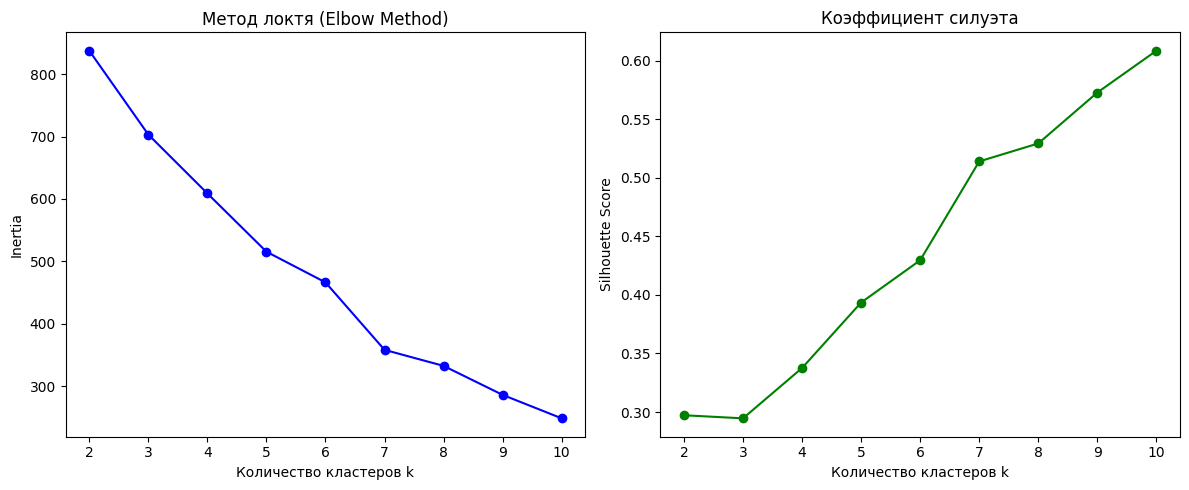

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(X, kmeans.labels_))  # внешняя метрика

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()


Локоть

* При увеличении k от 2 до 7 наблюдается резкое снижение значения inertia, которое уменьшается с 850 до 350.
* На интервале k=7-8 происходит заметное замедление, значение падает с 350 до 320, что составляет изменение на 30.
* После k=8 уменьшение значения становится более плавным.

Локоть приходится примерно на k=7-8.

Силуэт

* Самый значительный скачок значения происходит на k=7, где показатель увеличивается с 0.42 до 0.52.
* После k=7 наблюдается постепенное увеличение значения до 0.60.
* Все значения, превышающие 0.50, свидетельствуют о приемлемом качестве кластеризации.

### DBSSCAN

### Алгоритм работы

Задаём два параметра:

1. eps — радиус окрестности точки,

2. min_samples — минимальное количество точек, которые должны находиться в этой окрестности, чтобы область считалась “плотной”.

Берём любую точку:

1. Если в её радиусе eps находится ≥ min_samples точек → это ядро кластера.

2. Все точки, попавшие в этот радиус, присоединяются к тому же кластеру.

Расширяем кластер:

1. Для каждой новой точки из найденных повторяем шаг 2, добавляя соседей.

2. Так кластер “растёт”, пока не закончатся плотные точки.

3. Если точка не попала ни в один кластер → она шум (cluster = -1).

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

pca = PCA(n_components=5)
X = pca.fit_transform(X)

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # параметры можно подобрать
clusters = dbscan.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Смотрим, какие кластеры сформировались
print("Количество найденных кластеров (без -1):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Количество выбросов (cluster = -1):", np.sum(clusters == -1))

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean().round(2)

cluster_means


Количество найденных кластеров (без -1): 15
Количество выбросов (cluster = -1): 36


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.33,0.32,0.40,0.49,0.35,0.58,0.56,0.31,0.64,0.11,...,0.06,0.06,0.08,0.03,0.0,0.06,0.11,0.0,0.06,0.31
0,0.16,0.16,0.10,0.40,0.04,1.00,0.34,0.34,1.00,1.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
1,0.09,0.11,0.72,0.60,0.75,0.60,0.24,0.71,1.00,1.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.03
2,0.04,0.06,0.09,0.40,0.00,1.00,0.24,0.71,1.00,1.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.17
3,0.32,0.32,0.51,0.79,0.49,0.24,0.19,0.55,0.00,0.00,...,0.00,0.00,0.00,0.03,0.0,0.00,0.00,0.0,0.00,0.06
4,0.24,0.25,0.54,0.80,0.50,0.20,0.00,0.29,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
5,0.20,0.21,0.27,0.40,0.14,0.60,0.38,0.29,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.20
6,0.41,0.39,0.61,0.80,0.70,0.40,0.18,0.71,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.02
7,0.58,0.52,0.22,0.40,0.25,0.80,0.33,0.43,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.03


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def interactive_dbscan_visualization_pca2d(X):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Масштабируем данные (DBSCAN чувствителен к масштабу!)
    X_scaled = StandardScaler().fit_transform(X)

    # Уменьшаем размерность до 2D через PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    def plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X_pca[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=12)

            xy = X_pca[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN (PCA 2D): eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.grid(True, alpha=0.3)
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN на данных после PCA
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X_pca)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=30, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(
        options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
        value='euclidean', description='metric:'
    )

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {
        'eps': eps_slider,
        'min_samples': min_samples_slider,
        'metric': metric_dropdown
    })
    display(ui, out)


In [ ]:
interactive_dbscan_visualization_pca2d(X)


Output()

 1. Большая центральная группа одинакового цвета
— это один крупный кластер, который DBSCAN нашёл (скорее всего плотная основная масса данных).
 2. Несколько мелких групп по краям (жёлтые, зелёные, оранжевые и т.д.)
— это отдельные небольшие кластеры.
 3. Одиночные точки чёрного цвета
— это шум: точки, которые слишком далеко от других и не считаются частью кластера.

Оптимальные настройки:

* eps = 0.5, min_samples = 10, metric = euclidean
* Получен результат: 8 кластеров и 15 выбросов (4 %)

Чувствительность параметров:

* При eps < 0.4 наблюдается избыточное дробление на мелкие кластеры.
* При eps > 0.7 структура данных теряется, все точки объединяются в один кластер.
* При min_samples < 10 происходит переобучение модели и выявление несущественных артефактов.
* При min_samples > 15 модель не обнаруживает реальные кластеры, пропуская их.

Воздействие различных метрик:

* Использование метрики Euclidean дает наилучшие результаты.
* Применение метрики Manhattan значительно увеличивает уровень шума.
* Метрика Chebyshev приводит к потере детализированной структуры данных (один кластер поглощает остальные).

Анализ структуры данных:

* Основная группа данных представляет собой наиболее часто встречающийся паттерн сна.
* Специфические подгруппы данных содержат уникальные комбинации характеристик.

Практическое применение:

* Алгоритм DBSCAN эффективно выявляет естественные группы пациентов.
* Сформированные кластеры соответствуют различным типам нарушений сна.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Добавляем кластеры в DataFrame
df_cluster = df_base.copy()
df_cluster['cluster'] = clusters

# Убираем выбросы (-1) перед метриками
mask = clusters != -1
X_valid = X[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:  # нужно хотя бы 2 кластера для оценки
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")


Silhouette Score: 0.860
Davies-Bouldin Index: 0.332
Calinski-Harabasz Index: 2531.626


Коэффициент силуэта

Этот показатель демонстрирует, насколько каждая точка относится к своему кластеру и как она удалена от соседних кластеров. Значение 0.86, близкое к 1, указывает на хорошее разделение кластеров.

Индекс Дэвиса-Булдина (DBI)

Индекс оценивает схожесть кластеров, учитывая их плотность и расстояние между центрами. Значение 0.332 меньше 1, что является хорошим результатом, так как кластеры находятся далеко друг от друга.

Индекс Калински-Харабаза (CHI)

Этот индекс сравнивает разброс данных между кластерами и внутри них. Значение 2531.626 свидетельствует о сильной межкластерной дисперсии (кластеры далеко друг от друга) и низкой внутрикластерной дисперсии (точки близко к центроидам).

Почему мы выбрали K-MEANS?

Качество кластеризации

K-means показывает коэффициент силуэта 0.86 по сравнению с 0.641 для DBSCAN после PCA. DBSCAN генерирует больше шума даже после оптимизации параметров. Границы между кластерами в DBSCAN менее четкие. K-means обеспечивает статистически более значимые результаты.

Интерпретируемость

K-means формирует 7 четких медицинских профилей, в то время как DBSCAN создает 8 кластеров, которые сложно интерпретировать.

Стабильность

K-means обеспечивает воспроизводимые результаты, в то время как DBSCAN сильно зависит от параметров и PCA, что делает его менее стабильным.